Esse script tem como objetivo conhecer a base dados, fazer limpeza e transformação para aplicação de machine learning, e também explorar as relações entre os atributos da base. Ao final do script, será gerado um arquivo contendo as modificações feitas na base original para aplicação dos modelos preditivos.

In [1]:
#importando as bibliotecas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#importando o dataframe
df = pd.read_csv('train.csv')

In [3]:
#verificando as dimensões 
df.shape

(76020, 371)

In [4]:
#o data frame possuí muitas colunas, verificando os dados sumarizados de forma transposta
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,76020.0,75964.050723,43781.947379,1.00,38104.7500,76043.00,113748.7500,151838.00
var3,76020.0,-1523.199277,39033.462364,-999999.00,2.0000,2.00,2.0000,238.00
var15,76020.0,33.212865,12.956486,5.00,23.0000,28.00,40.0000,105.00
imp_ent_var16_ult1,76020.0,86.208265,1614.757313,0.00,0.0000,0.00,0.0000,210000.00
imp_op_var39_comer_ult1,76020.0,72.363067,339.315831,0.00,0.0000,0.00,0.0000,12888.03
imp_op_var39_comer_ult3,76020.0,119.529632,546.266294,0.00,0.0000,0.00,0.0000,21024.81
imp_op_var40_comer_ult1,76020.0,3.559130,93.155749,0.00,0.0000,0.00,0.0000,8237.82
imp_op_var40_comer_ult3,76020.0,6.472698,153.737066,0.00,0.0000,0.00,0.0000,11073.57
imp_op_var40_efect_ult1,76020.0,0.412946,30.604864,0.00,0.0000,0.00,0.0000,6600.00
imp_op_var40_efect_ult3,76020.0,0.567352,36.513513,0.00,0.0000,0.00,0.0000,6600.00


In [5]:
#muitos atributos apresentam valores zerados em sua grande maioria (75% dos dados, alguns atributos possuem valores binários)
#verificando a quantidade de atributos que possuem no mínimo 75% dos valores zerados
ds = df.describe().T
ds.loc[(ds["75%"]==0) & (ds["max"]>1),:].shape[0]

240

240 atributos (não binários) possuem no mínimo 75% dos valores igual a 0

In [6]:
#verificando atributos que possuem apenas valor igual a 0
ds.loc[(ds["min"]==0) & (ds["max"]==0),:].shape[0]

34

34 atributos possuem apenas valor zero, esses atributos serão removidos do data frame

In [7]:
df.drop(columns=ds.loc[(ds["min"]==0) & (ds["max"]==0),:].index, inplace=True)

In [8]:
#verificando os atributos binários
ds.loc[(ds["min"]==0) & (ds["max"]==1),:].shape[0]

67

67 atributos binários

In [9]:
#verificando se todos os atributos são numéricos
np.unique(df.apply(lambda x: x.dtype))

array([dtype('float64')], dtype=object)

Todos os atributos são numéricos

In [10]:
#verificando se existe algum valor não disponível
np.sum((np.sum(df.isna())))

0

Nenhum valor não disponivel, todos estão devidamente preenchidos

In [11]:
#verificando a correlação entre os atributos
cor = pd.melt(df.corr().reset_index(), id_vars='index', value_vars=df.columns, var_name='attr2', value_name='correlação')
cor.rename(columns={"index" : "attr1"},inplace=True)
#removendo os atributos duplicados e os comparativos com os próprios atributos
cor = cor.merge(pd.DataFrame({"attr1" : df.columns, "ind_attr1" : np.arange(0,len(df.columns))}),how="left",on="attr1")
cor = cor.merge(pd.DataFrame({"attr2" : df.columns, "ind_attr2" : np.arange(0,len(df.columns))}),how="left",on="attr2")
cor.drop(index=cor.loc[cor["ind_attr1"]>=cor["ind_attr2"],:].index,axis=1,inplace=True)

In [12]:
#correlação absoluta
cor["corAbs"] = np.abs(cor["correlação"])
#ordendando pela correlação absoluta decrescente
cor.sort_values(by="corAbs",ascending=False, inplace=True)

In [13]:
#atributos com correlação com outros atributos da base igual 1, serão eleminados para evitar ruidos no modelo preditivo
len(np.unique(cor.loc[cor["corAbs"]==1,["attr2"]]))

32

32 atributos com correlação com outros atributos igual 1

In [14]:
#eliminando atributos com alto grau de correlação
df.drop(columns=np.unique(cor.loc[cor["corAbs"]==1,["attr2"]]), inplace=True)

In [15]:
df.shape

(76020, 305)

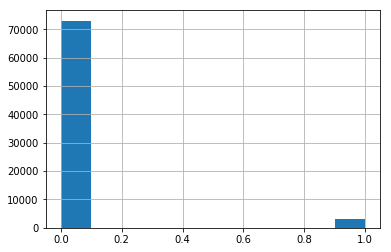

In [16]:
#verificando o balanceamento da base na variável target
df["TARGET"].hist()

Base está desbalanceada, deverá ser usada uma técnica de balanceamento para o treinamento do modelo preditivo

In [17]:
#media dos valores
np.mean(df["TARGET"])*100

3.9568534596158904

Menos de 4% dos registros possuem valores no TARGET igual a 1

In [18]:
#agrupando os valores númericos com muitos valores distintos em categorias e verificando os atributos com maior desvio 
#padrão em relação a média
lengths = df.apply(lambda x: len(np.unique(x)))
desvios = pd.DataFrame({"var" : [], "std":[]})
cols = lengths[lengths>100].index
for col in cols:
        desvios = desvios.append({"var" : col, "std" : np.std(pd.DataFrame({"Categoria" : pd.cut(df[col],30), "Valores" : df["TARGET"]}).groupby(by="Categoria").mean())[0]}, ignore_index=True)


In [19]:
desvios = desvios.sort_values(by="std", ascending=False)
desvios.head()

,var,std
32,saldo_var40,0.262592
2,imp_ent_var16_ult1,0.255087
15,imp_op_var39_ult1,0.225660
5,imp_op_var40_comer_ult1,0.219564
8,imp_op_var41_comer_ult1,0.202758


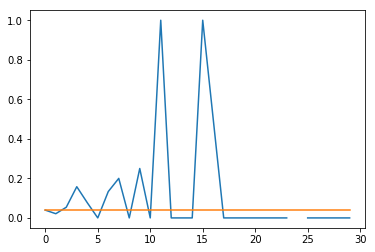

In [20]:
#verificando como a variação da média de alguns atributos se comportam em relação a variáel TARGET (linha laranja 
#com a média geral), atributo que apresentou o maior desvio padrão:
dt = pd.DataFrame({"Categoria" : pd.cut(df["saldo_var40"],30), "Valores" : df["TARGET"]}).groupby(by="Categoria").mean().reset_index()
plt.plot(dt["Valores"])
plt.plot((np.zeros(30)+np.mean(df["TARGET"])))

Alguns grupos apresentam bastante oscilação com relação a média, verificando a distribuição dos dados dentro das categorias

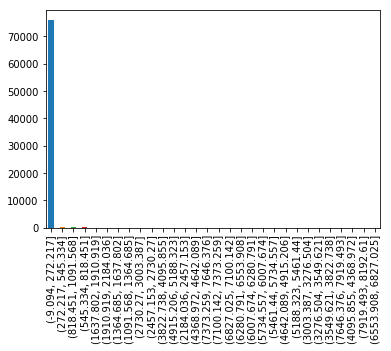

In [21]:
pd.DataFrame({"Categoria" : pd.cut(df["saldo_var40"],30), "Valores" : df["TARGET"]})["Categoria"].value_counts().plot('bar')

A maioria dos dados está na primeira categoria, dividindo os dados em quartis

In [22]:
np.quantile(df["saldo_var40"],np.arange(0,1,0.1))

array([-0.9,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ])

Esse atributo está entre os que possuem mais de 75% dos valores zerados, existem valores menores que zero, verificar esses valores

In [23]:
df[df["saldo_var40"]<0].shape[0]

1

Apenas 1 valor menor que zero, será testado binarizar o atributo (<=0 = 0, >0 = 1) e verificar a média da variável TARGET

In [24]:
#binarizando o atributo, colocando o dados em uma nova coluna para não perder a informação original
df["saldo_var40_"] = df["saldo_var40"]
df.loc[df["saldo_var40_"]<0,["saldo_var40_"]]=0
df.loc[df["saldo_var40_"]>0,["saldo_var40_"]]=1

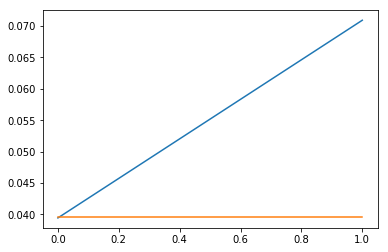

In [25]:
#verificando como a variação da média do atributo binário se comporta em relação a variáel TARGET (linha com a média geral)
plt.plot(df[["saldo_var40_","TARGET"]].groupby(by="saldo_var40_").mean())
plt.plot((np.zeros(2)+np.mean(df["TARGET"])))

In [26]:
(df[df["saldo_var40_"]==1].shape[0]/df.shape[0])*100

0.37095501183898977

Apesar da diferença na média do TARGET entre os valores 0 e 1, menos de 0,4% da base possuí esse atributo igual a 1.<br><br>
Conforme visto anteriormente, existem 240 atributos não binários com no mínimo 75% dos valores igual a 0. Todos esses atributos serão binarizados

In [27]:
df.drop(columns="saldo_var40_", inplace=True)

In [28]:
#atributos com minimo de 75% de valores igual a 0
ds = df.describe().T
binar = ds.loc[(ds["75%"]==0) & (ds["max"]>1)].index
for i in binar:
    df.loc[df[i]<0, [i]] = 0
    df.loc[df[i]>0, [i]] = 1

In [29]:
#verificando a média da variável TARGET nos dados
dt = pd.DataFrame({"Var" : [], "Val0" : [], "Val1": []})
for i in binar:
    dt = dt.append({"Var" : i, "Val0": np.mean(df.loc[df[i]==0,["TARGET"]])[0], "Val1": np.mean(df.loc[df[i]==1,["TARGET"]])[0]},ignore_index=True)

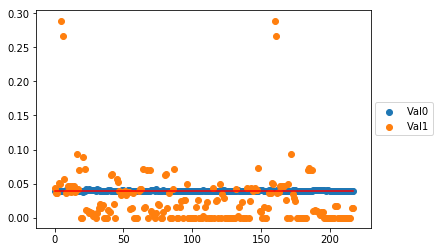

In [30]:
plt.scatter(dt.index,dt["Val0"])
plt.scatter(dt.index,dt["Val1"])
plt.plot((np.zeros(dt.shape[0])+np.mean(df["TARGET"])),color='red')
plt.legend(bbox_to_anchor=(1.2,0.6))

Os valores igual a 0 seguem a tendêcia da média geral (o que era esperado, visto que são a grande maioria), enquanto que os valores igual a 1 possuem bastante variação na média (a maioria deles menor que a média geral).

In [31]:
ds = df.describe().T
ds.loc[(ds["max"]>1),:].shape[0]

30

30 atributos ainda permanecem como numéricos, verificando esses atributos

In [32]:
desvios.loc[(~desvios["var"].isin(ds.loc[(ds["max"]==1),:].index)),:]

,var,std
65,var38,0.120137
40,num_var45_ult3,0.105135
42,saldo_medio_var5_hace3,0.019380
17,saldo_var5,0.016806
41,saldo_medio_var5_hace2,0.011556
44,saldo_medio_var5_ult3,0.011304
1,var3,0.011181
43,saldo_medio_var5_ult1,0.010153
33,saldo_var42,0.009901
29,saldo_var30,0.008984


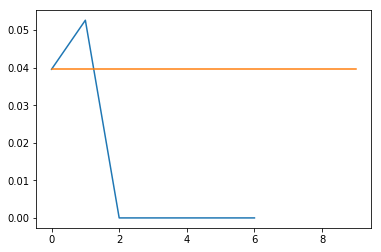

In [33]:
#verificando o comportamento da média da variável TARGET por categoria em um determinado atributo
#variável com maior desvio padrão na média do target
dt = pd.DataFrame({"Categoria" : pd.cut(df["var38"],10), "Valores" : df["TARGET"]}).groupby(by="Categoria").mean().reset_index()
plt.plot(dt["Valores"])
plt.plot((np.zeros(10)+np.mean(df["TARGET"])))

Pode-se obeservar que a primeira categoria segue a média geral, a segunda tem um leve aumento e a partir da terceira a média caí para 0

In [34]:
pd.cut(df["var38"],10).cat.categories

IntervalIndex([(-16865.825, 2208121.251], (2208121.251, 4411078.752], (4411078.752, 6614036.253], (6614036.253, 8816993.754], (8816993.754, 11019951.255], (11019951.255, 13222908.756], (13222908.756, 15425866.257], (15425866.257, 17628823.758], (17628823.758, 19831781.259], (19831781.259, 22034738.76]]
              closed='right',
              dtype='interval[float64]')

In [35]:
df.loc[(df["var38"]>=-16865.825) & (df["var38"]<2208121.251),:].shape[0]/df.shape[0]

0.9994738226782426

Quase todos os dados estão na primeira categoria, dividido em quartis

In [36]:
qurts = np.quantile(df["var38"],np.arange(0.1,1,0.1))
qurts

array([ 48070.59      ,  61496.916     ,  74152.065     ,  88571.67      ,
       106409.16      , 117310.97901649, 117310.97901649, 132859.344     ,
       182585.919     ])

In [37]:
df["var38C"] = 0
for i in np.arange(1,9):
     df.loc[(df["var38"]>=qurts[i-1]) & (df["var38"]<qurts[i]),"var38C"] = i
df.loc[(df["var38"]>=qurts[8]),"var38C"] = 9

In [38]:
#o valor 117310.97901649 está em duas categorias, provavelmente esse é o valor da moda desse atributo
import scipy.stats
scipy.stats.mode(df["var38"])[0][0]

117310.979016494

In [39]:
#serão colocados todos registros com esse valor na categoria 6
df.loc[(df["var38"]==scipy.stats.mode(df["var38"])[0][0]),"var38C"]=6

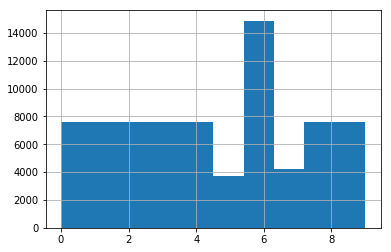

In [40]:
df["var38C"].hist(bins=10)

A distribuição agora está mais equilibrada, apesar da categoria 6, contendo um valor unico com a moda do atributo, estar acima das demais

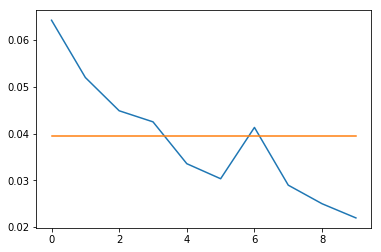

In [41]:
#colocando os dados no gráfico após a categorização dos atributos
plt.plot(df[["var38C","TARGET"]].groupby(by="var38C").mean().reset_index()["TARGET"])
plt.plot((np.zeros(10)+np.mean(df["TARGET"])))

Pode-se observar no gráfico, que quanto maior o valor do atributo, menor é a média da variável target

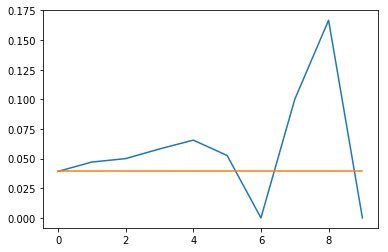

In [42]:
#mesmo processo que o anterior com a variável com o segundo maior desvio padrão
dt = pd.DataFrame({"Categoria" : pd.cut(df["num_var45_ult3"],10), "Valores" : df["TARGET"]}).groupby(by="Categoria").mean().reset_index()
plt.plot(dt["Valores"])
plt.plot((np.zeros(10)+np.mean(df["TARGET"])))

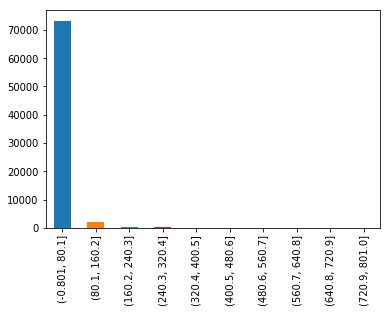

In [43]:
pd.DataFrame({"Categoria" : pd.cut(df["num_var45_ult3"],10)})["Categoria"].value_counts().plot('bar')

O gráfico com a média por categoria possuí uma variação bastante considerável, porém nessa variável os dados também estão concentrados na primeira categoria

In [44]:
#criando quartis
qurts = np.quantile(df["num_var45_ult3"],np.arange(0.1,1,0.1))
qurts

array([ 0.,  0.,  0.,  0.,  0.,  3.,  9., 18., 39.])

Nessa variável, muitos valores estão igual a 0, podemos observar que a mediana é zero

In [45]:
#as categorias serão criadas da seguinte maneira: =0, <=3, <=9, <=18, <=39, >39
df["num_var45_ult3C"] = 0
df.loc[(df["num_var45_ult3"]>0) & (df["num_var45_ult3"]<=3),"num_var45_ult3C"] = 1
df.loc[(df["num_var45_ult3"]>3) & (df["num_var45_ult3"]<=9),"num_var45_ult3C"] = 2
df.loc[(df["num_var45_ult3"]>9) & (df["num_var45_ult3"]<=18),"num_var45_ult3C"] = 3
df.loc[(df["num_var45_ult3"]>18) & (df["num_var45_ult3"]<=39),"num_var45_ult3C"] = 4
df.loc[(df["num_var45_ult3"]>39),"num_var45_ult3C"] = 5

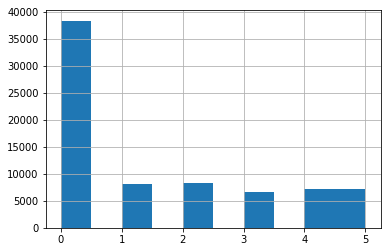

In [46]:
df["num_var45_ult3C"].hist()

Como já era esperado, a primeira categoria ficou com mais registros que as demais

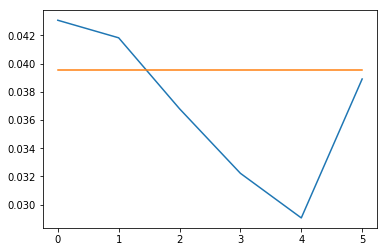

In [47]:
#colocando os dados no gráfico após a categorização dos atributos
plt.plot(df[["num_var45_ult3C","TARGET"]].groupby(by="num_var45_ult3C").mean().reset_index()["TARGET"])
plt.plot((np.zeros(6)+np.mean(df["TARGET"])))

Apesar da média subir na última categoria, esse atributo também apresenta uma tendência de queda na média conforme o valor da variável aumenta, porém, pode-se notar pela escala do gráfico que essa diferença é sutil

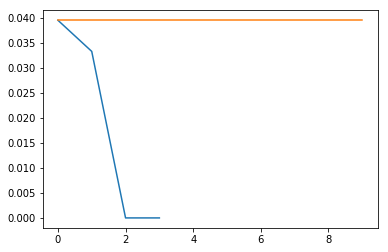

In [48]:
#a terceira variável de maior desvio padrão apresenta um desvio bem abaixo das duas primeiras
#verificando na terceira variável como está a média do target por categoria
dt = pd.DataFrame({"Categoria" : pd.cut(df["saldo_medio_var5_hace3"],10), "Valores" : df["TARGET"]}).groupby(by="Categoria").mean().reset_index()
plt.plot(dt["Valores"])
plt.plot((np.zeros(10)+np.mean(df["TARGET"])))

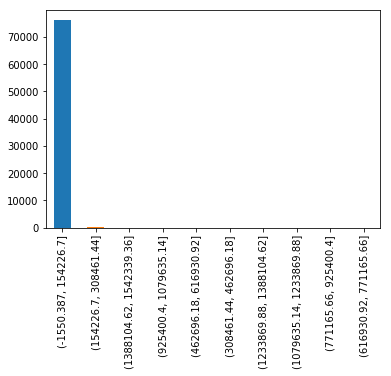

In [49]:
pd.DataFrame({"Categoria" : pd.cut(df["saldo_medio_var5_hace3"],10)})["Categoria"].value_counts().plot('bar')

O gráfico mostra uma alta concentração dos dados na primeira categoria

In [50]:
#criando quartis
qurts = np.quantile(df["saldo_medio_var5_hace3"],np.arange(0.1,1,0.1))
qurts

array([0.00000e+00, 0.00000e+00, 0.00000e+00, 9.00000e-02, 9.90000e-01,
       2.10000e+00, 4.95900e+00, 2.90400e+01, 1.23963e+02])

In [51]:
#a distribuiçã dos dados está proxima de zero, sendo que em até 30% dos dados os valores são iguais a zero
#separando os dados em 5 quartis
qurts = np.quantile(df["saldo_medio_var5_hace3"],np.arange(0.2,1,0.2))
qurts

array([ 0.  ,  0.09,  2.1 , 29.04])

In [52]:
#as categorias serão criadas da seguinte maneira: =0, <=0.09, <=2.1, <=29.04, >29.04
df["saldo_medio_var5_hace3C"] = 0
df.loc[(df["saldo_medio_var5_hace3"]>0) & (df["saldo_medio_var5_hace3"]<=0.09),"saldo_medio_var5_hace3C"] = 1
df.loc[(df["saldo_medio_var5_hace3"]>0.09) & (df["saldo_medio_var5_hace3"]<=2.1),"saldo_medio_var5_hace3C"] = 2
df.loc[(df["saldo_medio_var5_hace3"]>2.1) & (df["saldo_medio_var5_hace3"]<=29.04),"saldo_medio_var5_hace3C"] = 3
df.loc[(df["saldo_medio_var5_hace3"]>29.04),"saldo_medio_var5_hace3C"] = 4

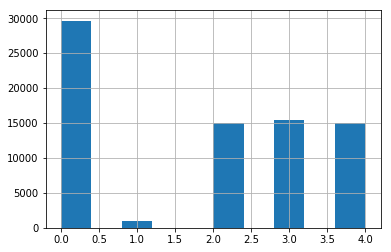

In [53]:
df["saldo_medio_var5_hace3C"].hist()

As categorias apresentam uma distribuição mais uniforme, apesar da categoria com os valores igual a zero estar acima das demais

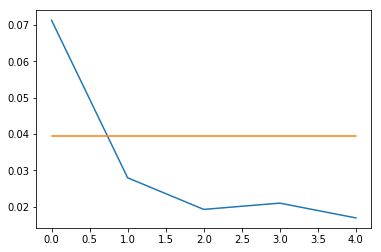

In [54]:
#colocando os dados no gráfico após a categorização dos atributos
plt.plot(df[["saldo_medio_var5_hace3C","TARGET"]].groupby(by="saldo_medio_var5_hace3C").mean().reset_index()["TARGET"])
plt.plot((np.zeros(5)+np.mean(df["TARGET"])))

Esse atributo já apresenta uma variação maior que o atributo anterior quanto a média da variável target por categoria, isso pode ser constatado pelas escalas do eixo Y nos dois gráficos. Assim como os atributos anteriores, a média do target diminuí conforme o valor do atributo aumenta. Isso demonstra indícios de que quanto maior for o saldo do cliente em certos atributos, ou seja, mais fidelizado ele for com a instituição, menor tem sido o grau de insatisfação. Essa afirmação também pode ser constatada no gráfico acima, onde os atributos com mais de 75% dos valores iguais a zero foram binarizados, e as médias foram comparadas nos grupos 0 e 1. Na sequência será criado um gráfico mostrando a proporção que os 20% com maior saldo em determinado atributo, detêm do total do atributo (teorema de Pareto).

In [55]:
#para essa análise será utilizado o dataset original
df2 = pd.read_csv('train.csv')
#elimando a coluna ID
df2.drop(columns="ID", inplace=True)

In [56]:
#criando dataframe para colocar os valores 
dt2 = pd.DataFrame({"Perc_Cat0" : np.zeros(df2.shape[1]),"Perc_Cat1" : np.zeros(df2.shape[1])}, index=df2.columns)
dt2.drop(index="TARGET",inplace=True)

In [57]:
#eliminando os valores que possuem máximo igual a zero
ds = df2.describe().T
df2.drop(columns=ds.loc[ds["max"]==0].index, inplace=True)

In [58]:
#calculando as médias e os percentuais
for i in range(df2.shape[1]-1):
    cut = np.quantile(df2.iloc[:,i],0.8)
    tot = np.sum(df2.iloc[:,i])
    dt2.loc[df2.columns[i],"Perc_Cat0"] = np.sum(df2.loc[df2.iloc[:,i]<=cut,df2.columns[i]])/tot
    dt2.loc[df2.columns[i],"Perc_Cat1"] = np.sum(df2.loc[df2.iloc[:,i]>cut,df2.columns[i]])/tot

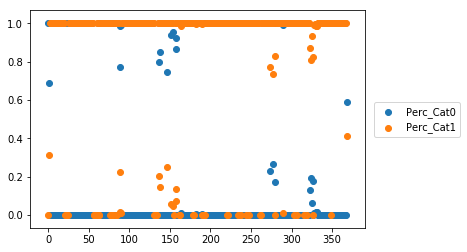

In [59]:
#criando o gráfico
dt2 = dt2.reset_index()
plt.scatter(dt2.index,dt2["Perc_Cat0"])
plt.scatter(dt2.index,dt2["Perc_Cat1"])
plt.legend(bbox_to_anchor=(1.3,0.6))

O gráfico mostra na maioria dos atributos, os 20% maiores valores representam 100% do total, portanto, esse gráfico será refeito, utilizando apenas os registros que possuem valor no atributo maior que 0.

In [60]:
dt2 = pd.DataFrame({"Perc_Cat0" : np.zeros(df2.shape[1]),"Perc_Cat1" : np.zeros(df2.shape[1])}, index=df2.columns)
dt2.drop(index="TARGET",inplace=True)

In [61]:
#serão incluídos na análise apenas atributos continuos, e que o valor máximo do atributo é diferente do valor do percentil 0.8
#serão eleminados também os atributos com total negativos, nessa base será inccluído o percentil 0.8 na categoria dos maiores
for i in range(df2.shape[1]-1):
    cut = np.quantile(df2.loc[df2.iloc[:,i]>0,df2.columns[i]],0.8)
    tot = np.sum(df2.iloc[:,i])  
    if((cut == np.max(df2.loc[df2.iloc[:,i]>0,df2.columns[i]])) or (tot<0)):
        dt2.drop(index=df2.columns[i], inplace=True)
    else:
        dt2.loc[df2.columns[i],"Perc_Cat0"] = np.sum(df2.loc[df2.iloc[:,i]<cut,df2.columns[i]])/tot
        dt2.loc[df2.columns[i],"Perc_Cat1"] = np.sum(df2.loc[df2.iloc[:,i]>=cut,df2.columns[i]])/tot

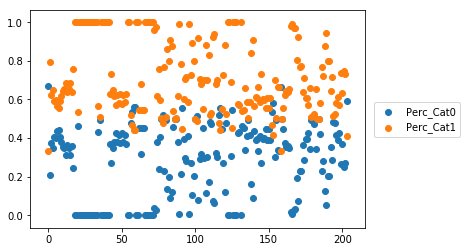

In [62]:
#gráfico de representatividade das categorias no total do atributo
dt2 = dt2.reset_index()
plt.scatter(dt2.index,dt2["Perc_Cat0"])
plt.scatter(dt2.index,dt2["Perc_Cat1"])
plt.legend(bbox_to_anchor=(1.3,0.6))

Na grande maioria dos atributos, os 20% maiores representam acima de 60% do total dos saldos, sendo que em muitos atributos este percentual está acima dos 80%.

In [63]:
#apagando os atributos criados para análise no dataframe transformado
df.drop(columns=["var38C","num_var45_ult3C","saldo_medio_var5_hace3C"], inplace=True)

In [64]:
#salvando o arquivo com as transformações para aplicação de machine learning
df.to_csv("data_work.csv", index = False)
